KMeans - aplicado para o conjunto de dados IRIS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None)
data.columns = ['sepal-lenght', 'sepal-width', 'petal-lenght', 'petal-width', 'class']
del data['class']
data.head()

,sepal-lenght,sepal-width,petal-lenght,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# Fazendo a estatística descritiva
data.describe()

,sepal-lenght,sepal-width,petal-lenght,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


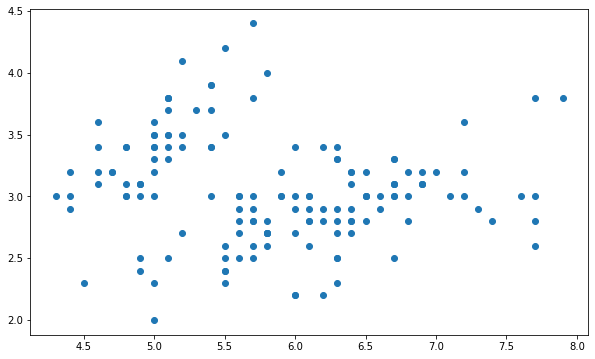

In [4]:
# Gerando gréfico, mostrando apenas o relacionamento entre o comprimento e largura da sépala
fig = plt.figure(figsize=(10,6))
sp = fig.add_subplot(1,1,1)
sp.scatter(data['sepal-lenght'],data['sepal-width'])

In [5]:
# execução do script KMeans()
kmeans = KMeans(n_clusters=3, init= 'k-means++', n_init=10, random_state=1234)
kmeans

KMeans(n_clusters=3, random_state=1234)

In [6]:
# Execução do script para predição das instâncias, baseados no 
# algoritmo de agrupamento
data["clusters"] = kmeans.fit_predict(data)
data

,sepal-lenght,sepal-width,petal-lenght,petal-width,clusters
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [7]:
# Sumário do número de instâncias a partir da execução do algoritmo k-means
group_count = data.groupby("clusters").size().reset_index(name='counts')
group_count

,clusters,counts
0,0,50
1,1,38
2,2,62


In [8]:
# Cálculo dos valores dos clusters para a análise de agrupamento do conjunto Iris
group = data.groupby("clusters")
group

In [9]:
gm = group.mean()
gm

,sepal-lenght,sepal-width,petal-lenght,petal-width
clusters,,,,
0,5.006000,3.418000,1.464000,0.244000
1,6.850000,3.073684,5.742105,2.071053
2,5.901613,2.748387,4.393548,1.433871


Text(0.5, 1.0, 'Iris')

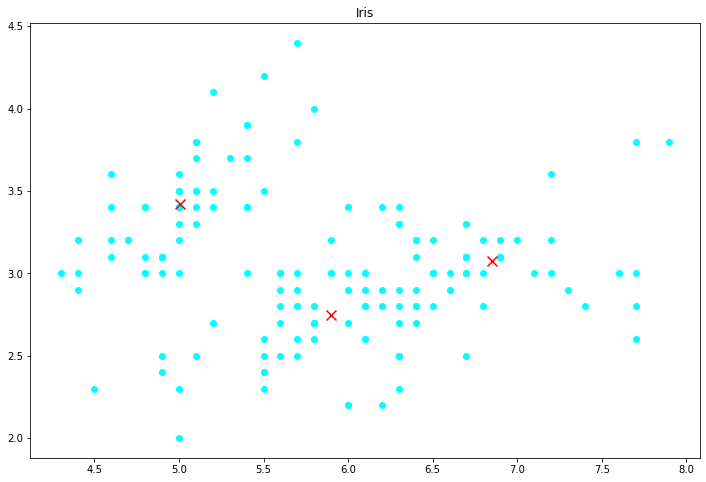

In [10]:
# Cálculo dos valores dos clusters para a análise de agrupamento do conjunto Iris
fig = plt.figure(figsize=(12,8))
sp = fig.add_subplot(1,1,1)
sp.scatter(data['sepal-lenght'],data['sepal-width'],color='cyan')
sp.scatter(gm['sepal-lenght'],gm['sepal-width'], marker ='x', s=100, color='red')
plt.title("Iris")

Text(0.5, 1.0, 'Iris')

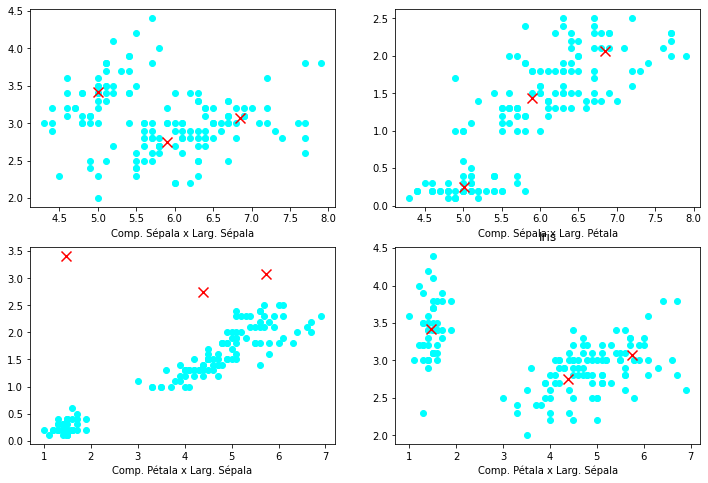

In [11]:
#Script para construção dos quatro gráficos para a análise de agrupamento do conjunto Iris
fig = plt.figure(figsize=(12,8))
sp = fig.add_subplot(2,2,1)
sp.scatter(data['sepal-lenght'],data['sepal-width'],color='cyan')
sp.scatter(gm['sepal-lenght'],gm['sepal-width'],marker='x',s=100,color='red')
sp.set_xlabel("Comp. Sépala x Larg. Sépala")
sp = fig.add_subplot(2,2,2)
sp.scatter(data['sepal-lenght'],data['petal-width'],color='cyan')
sp.scatter(gm['sepal-lenght'],gm['petal-width'],marker='x',s=100,color='red')
sp.set_xlabel("Comp. Sépala x Larg. Pétala")
sp = fig.add_subplot(2,2,3)
sp.scatter(data['petal-lenght'],data['petal-width'],color='cyan')
sp.scatter(gm['petal-lenght'],gm['sepal-width'],marker='x',s=100,color='red')
sp.set_xlabel("Comp. Pétala x Larg. Sépala")
sp = fig.add_subplot(2,2,4)
sp.scatter(data['petal-lenght'],data['sepal-width'],color='cyan')
sp.scatter(gm['petal-lenght'],gm['sepal-width'],marker='x',s=100,color='red')
sp.set_xlabel("Comp. Pétala x Larg. Sépala")
plt.title("Iris")